In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
drivers_data=pd.read_excel('C:/Users/shubham.chhetri/Desktop/MYPROJECT/Machine learning/Designing a ML model/driverdata.xlsx')

In [6]:
drivers_data.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [7]:
drivers_data.shape

(10, 3)

In [ ]:
drivers_data=drivers_data.sample(frac=1)#shuffle the dataset

In [8]:
drivers_data.drop('Driver_ID',axis=1,inplace=True)
drivers_data.sample(5)

,Distance_Feature,Speeding_Feature
1,52.53,25
2,64.54,27
9,44.31,19
4,54.58,25
8,31.25,34


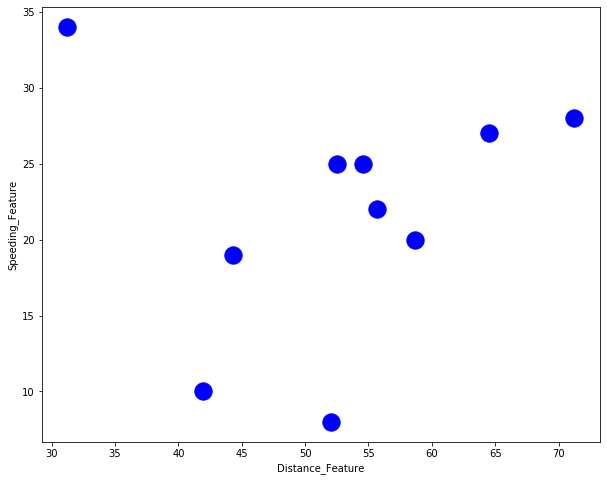

In [9]:
fig,ax=plt.subplots(figsize=(10,8))
plt.scatter(drivers_data['Distance_Feature'],drivers_data['Speeding_Feature'],s=300,c='blue')
plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')
plt.show()

In [10]:
from sklearn.cluster import KMeans
kmeans_model=KMeans(n_clusters=4,max_iter=100).fit(drivers_data)

In [11]:
kmeans_model.labels_

array([3, 0, 3, 0, 0, 1, 0, 1, 2, 1])

In [12]:
np.unique(kmeans_model.labels_)

array([0, 1, 2, 3])

In [13]:
zipped_list=list(zip(np.array(drivers_data),kmeans_model.labels_))
zipped_list

[(array([71.24, 28.  ]), 3),
 (array([52.53, 25.  ]), 0),
 (array([64.54, 27.  ]), 3),
 (array([55.69, 22.  ]), 0),
 (array([54.58, 25.  ]), 0),
 (array([41.91, 10.  ]), 1),
 (array([58.64, 20.  ]), 0),
 (array([52.02,  8.  ]), 1),
 (array([31.25, 34.  ]), 2),
 (array([44.31, 19.  ]), 1)]

In [14]:
centroids=kmeans_model.cluster_centers_
centroids

array([[55.36      , 23.        ],
       [46.08      , 12.33333333],
       [31.25      , 34.        ],
       [67.89      , 27.5       ]])

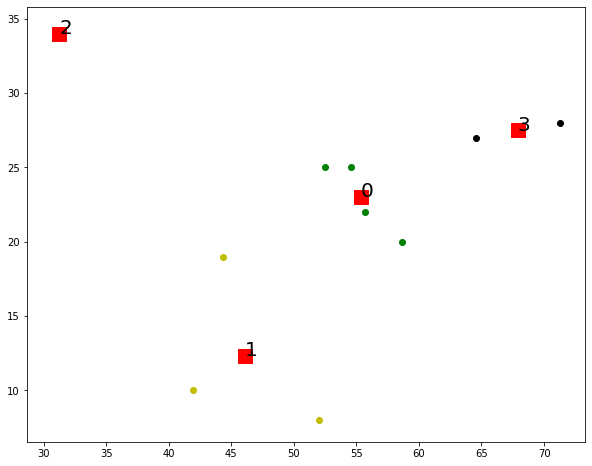

In [16]:
colors=['g','y','b','k']
plt.figure(figsize=(10,8))
for element in zipped_list:
    plt.scatter(element[0][0],element[0][1],c=colors[(element[1] % len(colors))])
plt.scatter(centroids[:,0],centroids[:,1],c='r',s=200,marker='s')    
for i in range(len(centroids)):
    plt.annotate(i,(centroids[i][0],centroids[i][1]),fontsize=20)

In [17]:
from sklearn.metrics import silhouette_score

In [18]:
print("silhouette score",silhouette_score(drivers_data,kmeans_model.labels_))

silhouette score 0.4351627523172751


When K=2

In [19]:
kmeans_model=KMeans(n_clusters=2,max_iter=100).fit(drivers_data)

In [20]:
kmeans_model.labels_

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1])

In [21]:
np.unique(kmeans_model.labels_)

array([0, 1])

In [22]:
zipped_list=list(zip(np.array(drivers_data),kmeans_model.labels_))
zipped_list

[(array([71.24, 28.  ]), 0),
 (array([52.53, 25.  ]), 0),
 (array([64.54, 27.  ]), 0),
 (array([55.69, 22.  ]), 0),
 (array([54.58, 25.  ]), 0),
 (array([41.91, 10.  ]), 1),
 (array([58.64, 20.  ]), 0),
 (array([52.02,  8.  ]), 1),
 (array([31.25, 34.  ]), 1),
 (array([44.31, 19.  ]), 1)]

In [23]:
centroids=kmeans_model.cluster_centers_
centroids

array([[59.53666667, 24.5       ],
       [42.3725    , 17.75      ]])

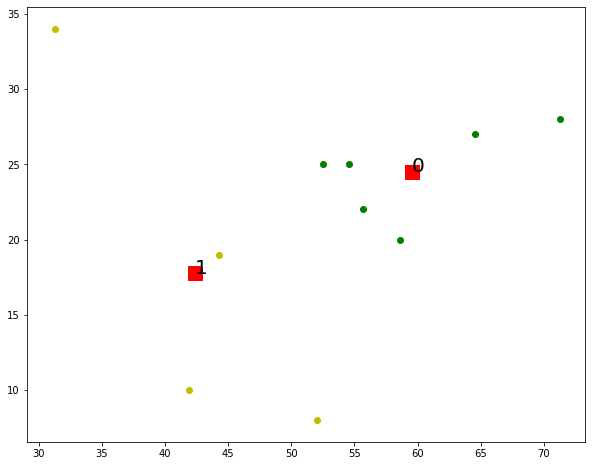

In [24]:
colors=['g','y','b','k']
plt.figure(figsize=(10,8))
for element in zipped_list:
    plt.scatter(element[0][0],element[0][1],c=colors[(element[1] % len(colors))])
plt.scatter(centroids[:,0],centroids[:,1],c='r',s=200,marker='s')    
for i in range(len(centroids)):
    plt.annotate(i,(centroids[i][0],centroids[i][1]),fontsize=20)

In [25]:
print("silhouette score",silhouette_score(drivers_data,kmeans_model.labels_))

silhouette score 0.3962301527012142
